In [1]:
import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import Slider

#matplotlib.style.use('sv1_style.mplstyle')

In [88]:
import numpy
InputVektor = [1, 2, 0, 0, 5]
v_Coeffs = numpy.array([1, 3, 4])
v_states = numpy.zeros((len(v_Coeffs)))
InputVektor = numpy.concatenate((InputVektor, [0]*(len(v_Coeffs)-1)))

out = []
for val in InputVektor:        # Annahme Daten stehen in InputVektor
    v_states[0] = val       # Neuen Datenwert in State speichern
    out.append(numpy.matmul(v_Coeffs, v_states))     # Skalarprodukt berechnen
    v_states[1:] = v_states[0:len(v_states)-1] # State Vector verschieben


[1.0, 5.0, 10.0, 8.0, 5.0, 15.0, 20.0]

c:\users\ma5997\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\ma5997\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


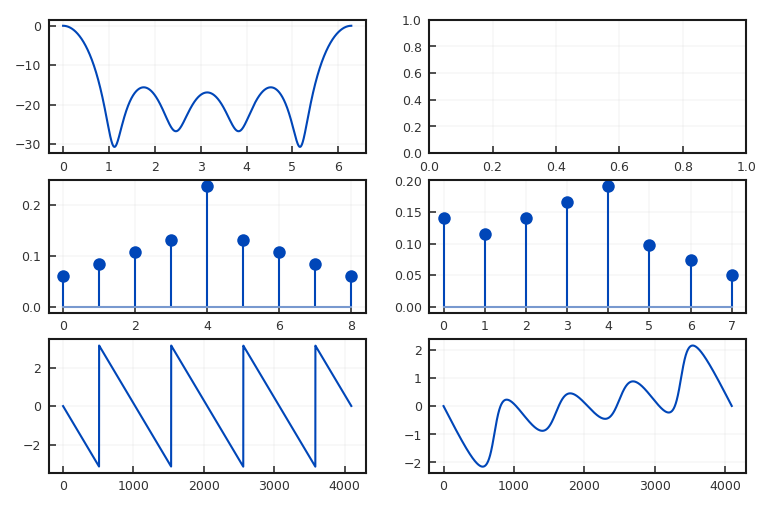

In [62]:
import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

matplotlib.style.use('sv1_style.mplstyle')

eps = numpy.finfo(float).eps
#h = [1, 0.001, 0.000001, 0.001, 0.000001, 0.0001, 0.001, 0.1, 0.0000001]
#H = [-10., -20., -10., -30., -10., -40., -20., -30., -10.]
b1 = [0.98]*4
b2 = [1.0/0.98]*4
h = numpy.poly(numpy.concatenate((b1, b2)))
h = [0.5, 0.7, 0.9, 1.1, 2, 1.1, 0.9, 0.7, 0.5]
h = numpy.array(h)/numpy.sum(h)
W, H = signal.freqz(b=h, a=1, worN=4*1024, whole=True)
fig, ((ax_H, ax_void), (ax_lin_zeit, ax_min_zeit), (ax_lin_phase, ax_min_phase)) = pyplot.subplots(3, 2)

log_H = numpy.log(numpy.abs(H)+eps)
h_c = numpy.fft.ifft(log_H).real
h_c[1 : int(len(h_c)/2)] *= 2
h_c[int(len(h_c)/2)+1 : ] = 0
H_min_log = numpy.fft.fft(h_c)
H_min = numpy.exp(H_min_log)
h_min = numpy.fft.ifft(H_min)
h_min = h_min[0:8]

ax_H.plot(W, 20*numpy.log10(numpy.abs(H)+eps))
ax_lin_zeit.stem(h, use_line_collection=True)
ax_min_zeit.stem(h_min, use_line_collection=True)
ax_lin_phase.plot(numpy.angle(H))
ax_min_phase.plot(numpy.angle(H_min))

pyplot.show()


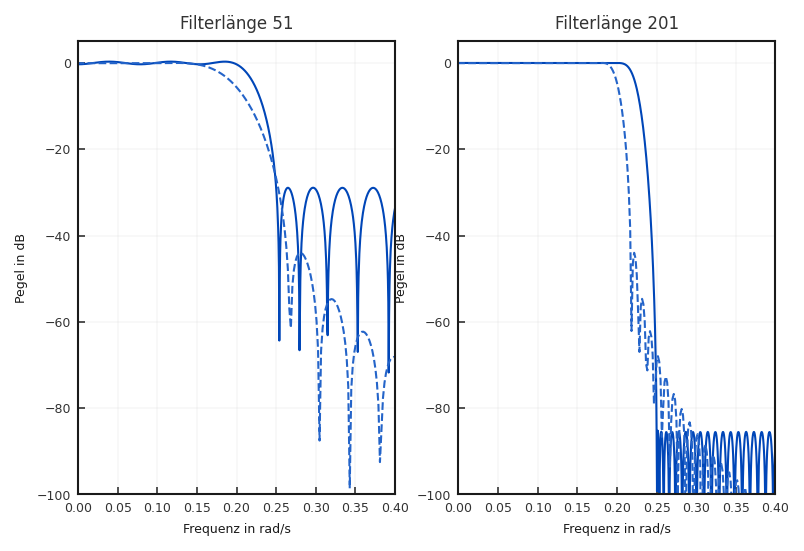

In [31]:
import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

#matplotlib.style.use('sv1_style.mplstyle')


fig, (ax_51, ax_201) = pyplot.subplots(1, 2)

eps = 0.00000000001
f_s = 48000 
f_g = 4800 # 0.2*pi

trans_width = 1200  # Width of transition from pass band to stop band, Hz

# Filterlänge 51
N = 51      # Size of the FIR filter.
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

# Remez
taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi

# Von Hann
w_rad = 2*numpy.pi*f_g/f_s
rect_window_51 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
von_hann_window = [0]*N
for idx in range(N):
    von_hann_window[idx] = 0.5 - 0.5*numpy.cos(2*numpy.pi*idx/N)
window_51 = numpy.array(rect_window_51) * numpy.array(von_hann_window)
spectrum = numpy.fft.fft(numpy.concatenate((window_51, [0]*1000)))
mid = numpy.floor(len(spectrum)/2)
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]])
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max())
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs))


ax_51.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_51.plot(freqs_fft, spectrum_abs, linestyle='--')

ax_51.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], ylim=[-100, 5], title='Filterlänge 51')

# Filterlänge 201

# Remez
N = 201     # Size of the FIR filter.
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi
# Von Hann
w_rad = 2*numpy.pi*f_g/f_s
rect_window_51 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
von_hann_window = [0]*N
for idx in range(N):
    von_hann_window[idx] = 0.5 - 0.5*numpy.cos(2*numpy.pi*idx/N)
window_201 = numpy.array(rect_window_51) * numpy.array(von_hann_window)
#von_hann_window = numpy.concatenate([von_hann_window, [0]*1000])
spectrum = numpy.fft.fft(numpy.concatenate((window_201, [0]*1000)))
mid = numpy.floor(len(spectrum)/2)
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]])
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max())
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs))


ax_201.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_201.plot(freqs_fft, spectrum_abs, linestyle='--')
ax_201.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], ylim=[-100, 5], title='Filterlänge 201')

pyplot.show()